In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import requests

# Test the emonCMS feed API

from [EmonCMS's forum](https://community.openenergymonitor.org/t/accessing-raw-data/6878):
> The data is stored in binary and is not ‘human readable’, The long description can be found here for PHPFina: https://learn.openenergymonitor.org/electricity-monitoring/timeseries/Fixed-interval 13 there’s also a history there of timeseries storage development in emoncms.

> Alternatively there is a guide here on exporting the data as CSV, you can export extended historic periods this way: https://guide.openenergymonitor.org/setup/export-csv/ 24 see full export via feeds interface.

* https://guide.openenergymonitor.org/emoncms/export-csv/

There is a problem when intervals are not regular. There are a lot of padded (empty) values, which prevents exporting raw data without strange averaging (only few points per bin).

- same with the feed API
> Request datapoint limit reached (8928), increase request interval or time range, requested datapoints = 150000

In [3]:
key = '121f36f529a93aeb0103b2c194f0bcd2'
ip_adress = '192.168.43.3'

In [4]:
url = f"http://{ip_adress}/feed/list.json"
r = requests.post(url, data={'apikey':key})
feeds = r.json()
print(r.url)

http://192.168.43.3/feed/list.json


In [5]:
for feed in feeds:
    print(feed['id'], feed['name'])

1 t1
5 temperatureA
6 humidityA
7 temperatureB
8 external temperatureB
9 humidityB


## Tentative to use the AI to download raw data

https://github.com/emoncms/emoncmsorg/blob/751ebfa2851ca6b8f955252fff5320a2d5f78438/emoncms/Modules/feed/engine/PHPFina.php#L267

In [7]:
feeds = {feed['name']:feed for feed in feeds}

# http://192.168.43.3/feed/get.json?id=1&field=name 
        
url = f'http://{ip_adress}/feed/getmeta.json'#?id=1 
payload = {'id':6, 'apikey':key}
r = requests.get(url, params=payload)
r.json()

In [146]:
data_limit = 8000

In [298]:
url = f'http://{ip_adress}/feed/data.json'
feed = feeds['external temperatureB']
interval = 60*30#feed['interval']  # seconds

s = int((feed['start_time']+1)*1000)
e = s + interval*1000 * 5000
payload = {'id': feed['id'], 'apikey':key,
           'interval':60, #int(interval/2),
           'start':s, 'end':e}
r = requests.get(url, params=payload)
print('status_code:', r.status_code)
data = r.json()
print('nbr_point:', len(data))

try:
    print(data['success'])
    print(data['message'])
except TypeError:
    pass

status_code: 200
nbr_point: 2
False
Request datapoint limit reached (8928), increase request interval or time range, requested datapoints = 150000


In [289]:
time = np.array( [u[0] for u in data] )
values = np.array( [u[1] for u in data] )
np.unique( np.diff(time) )/1000

array([ 60., 135., 255.])

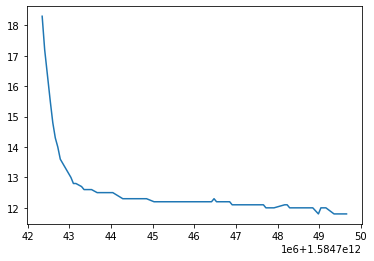

In [282]:
plt.plot(time, values)

In [114]:
url = 'http://192.168.43.3/feed/aget.json?id=8'

In [102]:
r = requests.get(url, params={'apikey':key})

In [103]:
r.json()

{'id': '8',
 'userid': '1',
 'name': 'external temperatureB',
 'datatype': '1',
 'tag': 'emonth1',
 'public': '0',
 'size': '',
 'engine': '5',
 'processList': '',
 'unit': '',
 'value': 23.6,
 'time': 1595112946}